## **`Assigmnent 4 - AI42001`**

___
**`Author     : Nishant Yadav`** \
**`Roll No.   : 19CY20025`** \
**`Due on : 30/11/2022`**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**`Data Cleaning and Sampling`**

In [2]:
# Substitute the path_to_file content by the path to your soil.csv file
path_to_file = 'soil.csv'
soil_data = pd.read_csv(path_to_file)
soil_data.shape

(673, 7)

In [3]:
# Removing the rows with missing data, found to be 73
soil_data = soil_data.dropna()
soil_data.shape

(600, 7)

In [4]:
# Sampling random 155 data points to cluster
soil_data = soil_data.sample(n = 155)
soil_data.head()

,District,Zn %,Fe%,Cu %,Mn %,B %,S %
465,Sangrur,90.91,89.50,99.85,60.88,3.29,88.62
321,Raisen,65.88,67.97,93.97,79.09,80.93,56.77
104,Balod,38.63,96.84,99.18,97.14,52.95,44.16
219,Bokaro,74.39,96.40,97.84,98.74,48.27,79.44
637,Muzaffarnagar,75.31,94.04,99.73,92.96,94.28,58.05


**`Data Visualization and Inferences using Scatter Plots and Heatmap`**

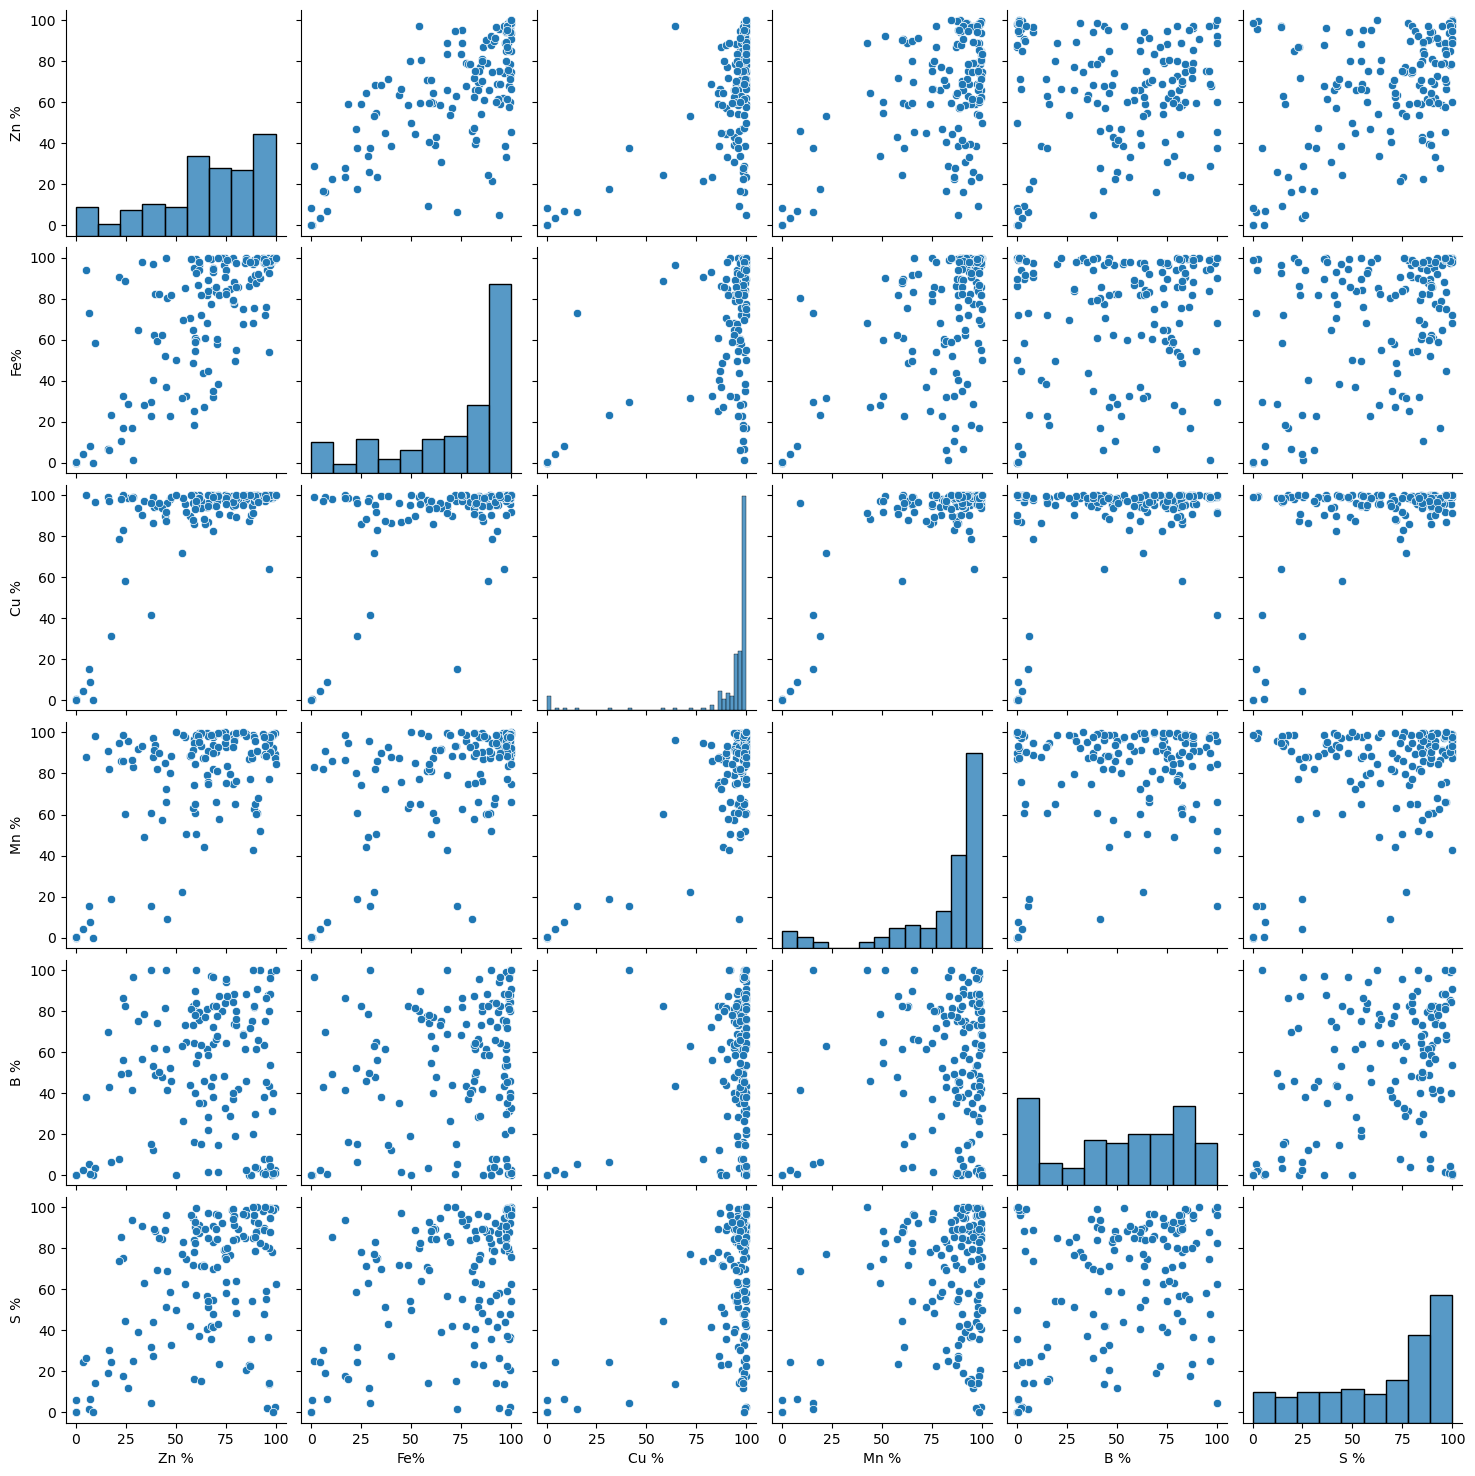

In [5]:
import seaborn as sns

# Dropping District column from data 
soil_data = soil_data.drop('District ', axis=1)

# Data Visualization
sns.pairplot(soil_data)

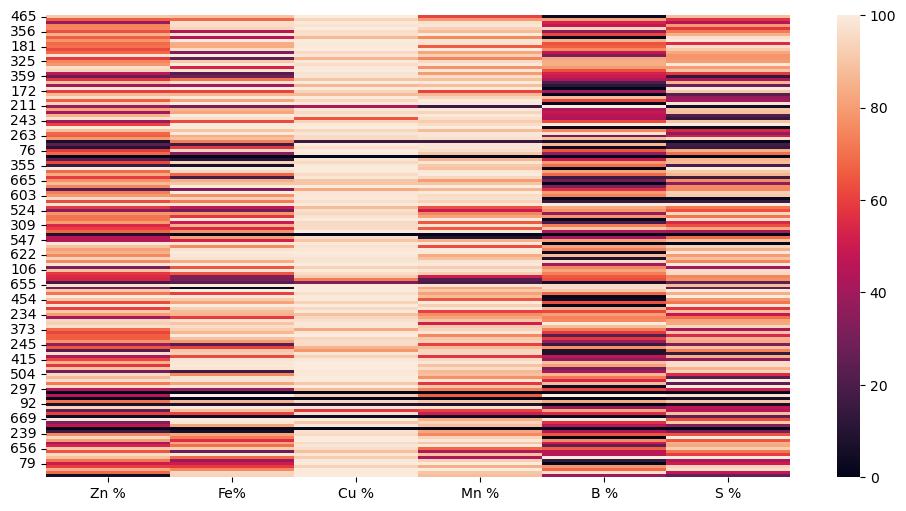

In [6]:
# Showing the Heatmap
plt.figure(1, figsize = (12, 6))
sns.heatmap(soil_data)
plt.show()

**`This heatmap represent the variance captured by each feature. At a glance we can eliminate Fe %, Cu %, Mn % and B % in order to choose best two features. Below is a scatter plot with best features which is the closest of all to get resonanly good clusters`**

<AxesSubplot:xlabel='S %', ylabel='Zn %'>

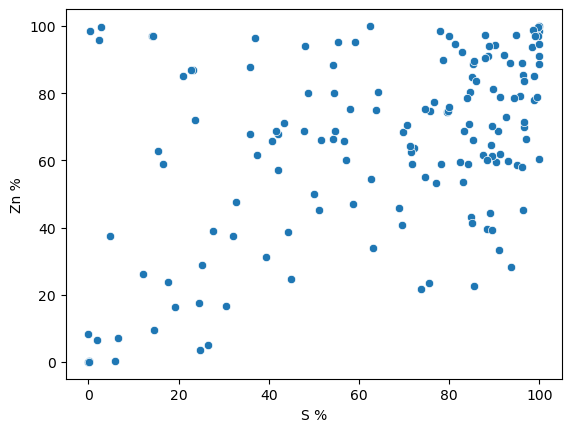

In [7]:
# Scatter plot of best two features Zn % and S %
sns.scatterplot(x=soil_data['S %'],
                y=soil_data['Zn %'])

In [8]:
# Selecting Zn % and S % using indexing
selected_data = soil_data.iloc[:, [True, False, False, False, False, True]]

## Visualizing Hierarchical Structure with Dendrograms

**`Linkage: Complete`**

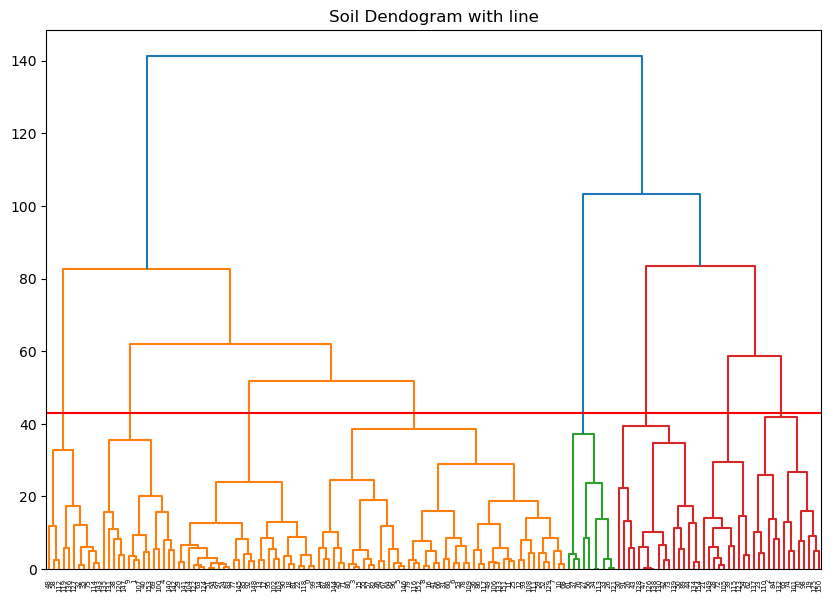

In [21]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Soil Dendogram with line Complete Linkage")
clusters = shc.linkage(selected_data, 
            method='complete', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 43, color = 'r', linestyle = '-')

**`Linkage: Single`**

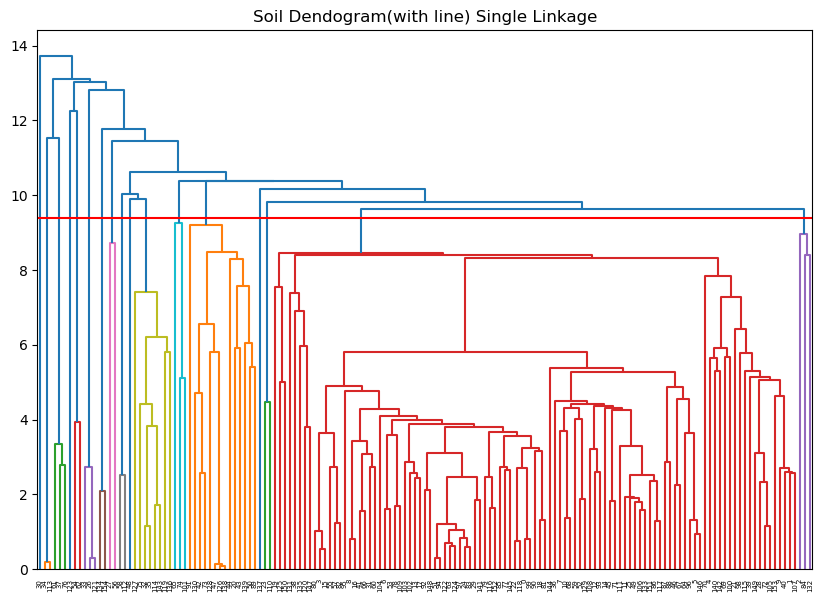

In [23]:
plt.figure(figsize=(10, 7))
plt.title("Soil Dendogram(with line) Single Linkage")
clusters = shc.linkage(selected_data, 
            method='single', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 9.4, color = 'r', linestyle = '-')

**`Linkage: Average`**

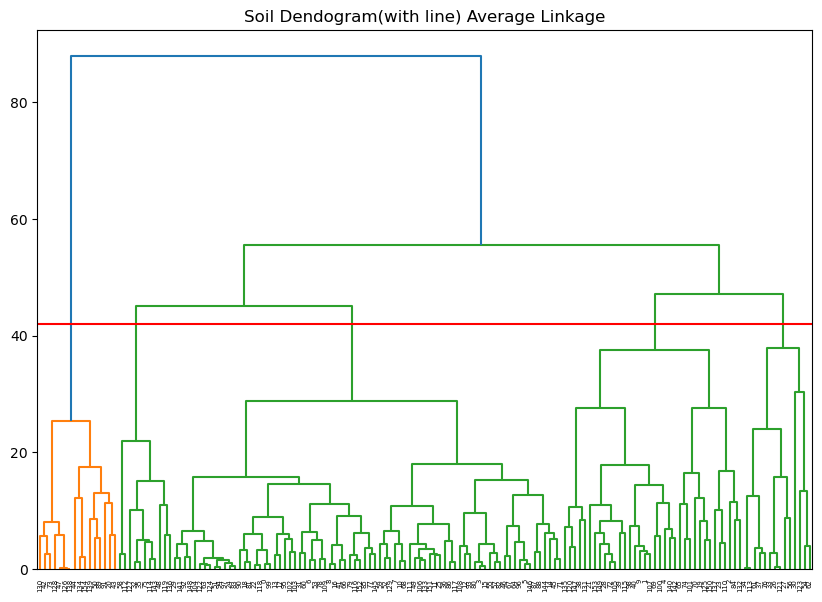

In [24]:
plt.figure(figsize=(10, 7))
plt.title("Soil Dendogram(with line) Average Linkage")
clusters = shc.linkage(selected_data, 
            method='average', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 42, color = 'r', linestyle = '-')

**`Linkage: Ward`**

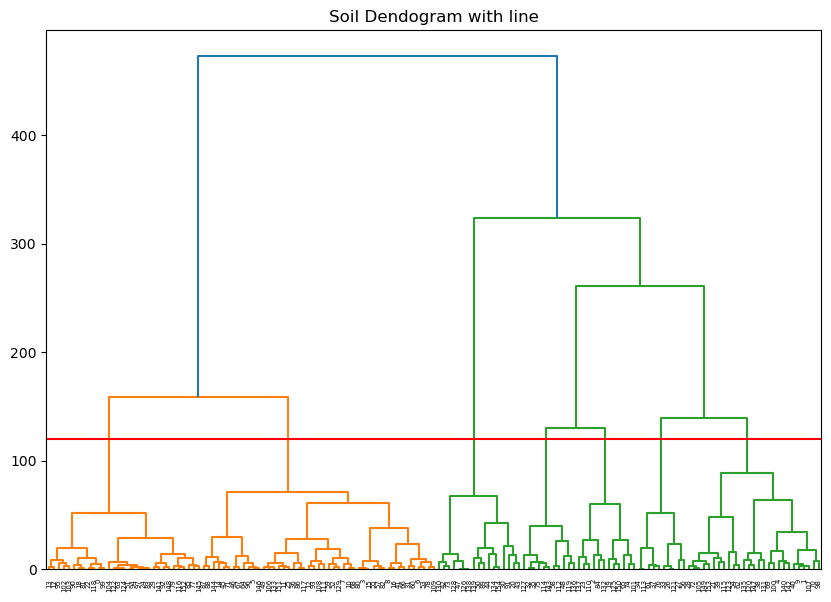

In [26]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Soil Dendogram with line")
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 120, color = 'r', linestyle = '-')

## Implementing an Agglomerative Hierarchical Clustering

**`Clusters: 8, Linkage: Complete`**

In [27]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters = 8, affinity='euclidean', linkage='complete')
clustering_model.fit(selected_data)
clustering_model.labels_

array([7, 5, 0, 3, 5, 3, 3, 3, 3, 5, 3, 3, 3, 7, 3, 3, 3, 7, 7, 0, 1, 6,
       7, 0, 7, 3, 2, 2, 6, 7, 1, 3, 4, 2, 2, 4, 3, 2, 5, 6, 5, 3, 1, 1,
       1, 3, 3, 1, 4, 3, 1, 7, 3, 3, 6, 3, 2, 3, 4, 3, 3, 2, 6, 7, 3, 0,
       3, 3, 3, 5, 0, 3, 6, 1, 0, 4, 2, 7, 3, 3, 3, 7, 3, 7, 0, 7, 3, 3,
       3, 1, 7, 1, 7, 3, 7, 7, 3, 7, 0, 7, 5, 0, 7, 7, 7, 6, 3, 5, 3, 3,
       0, 3, 4, 2, 4, 6, 3, 3, 7, 4, 5, 2, 7, 6, 7, 0, 1, 4, 1, 3, 1, 5,
       0, 3, 1, 5, 4, 0, 1, 1, 5, 7, 5, 4, 3, 7, 3, 5, 7, 6, 0, 3, 3, 5,
       1])

Text(0.5, 1.0, 'Labeled Soil Data with Complete Linkage')

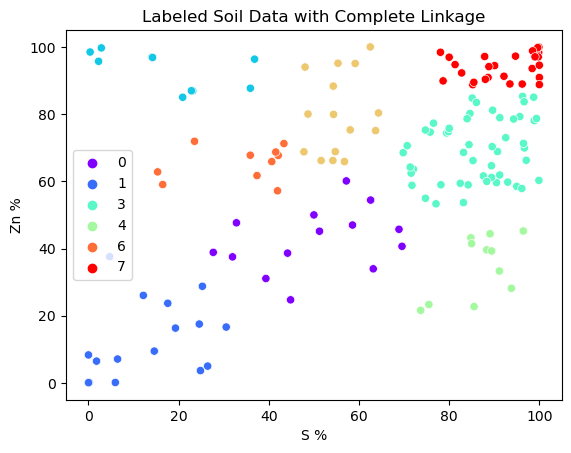

In [28]:
data_labels = clustering_model.labels_
sns.scatterplot(x='S %', 
                y='Zn %', 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Soil Data with Complete Linkage')

**`Clusters: 17, Linkage: Single`**

In [29]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters = 17, affinity='euclidean', linkage='single')
clustering_model.fit(selected_data)
clustering_model.labels_

array([ 3,  3,  1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  2,  3,  3,  7,  3,  3,  9,  4,  3,  3, 15,  3,  6,  9,
        8,  6,  3,  5,  3,  3,  3,  3,  2,  2,  2,  3,  3,  2, 12,  3,  2,
        3,  3,  3, 16,  3,  4,  3, 14,  3,  3,  5, 16,  3,  3,  0,  3,  3,
        3,  3,  3,  3,  3,  2,  0,  6,  5,  3,  3,  3,  3,  3,  3,  3,  1,
        3,  3,  3,  3,  2,  3,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  0,
        3,  3,  3,  3,  3,  3,  3,  3,  7,  3, 14,  8,  6,  3,  3,  3,  3,
        6,  3,  9,  3, 11,  3,  3,  2,  6,  2,  3,  2,  3,  1,  3, 13,  3,
        6, 10,  2,  2,  3,  3,  3,  6,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3, 13])

Text(0.5, 1.0, 'Labeled Soil Data with Single Linkage')

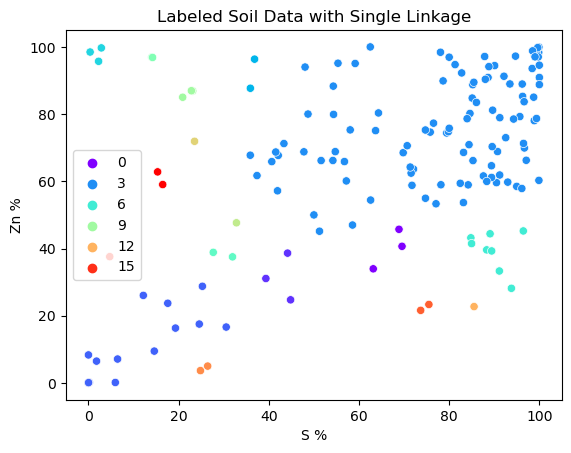

In [30]:
data_labels = clustering_model.labels_
sns.scatterplot(x='S %', 
                y='Zn %', 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Soil Data with Single Linkage')

**`Clusters: 5, Linkage: Average`**

In [31]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters = 5, affinity='euclidean', linkage='average')
clustering_model.fit(selected_data)
clustering_model.labels_

array([2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1,
       2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 4, 0, 0, 4, 2, 0, 1, 1, 1, 2, 3, 3,
       3, 2, 2, 3, 4, 2, 3, 2, 2, 2, 0, 2, 0, 2, 4, 2, 2, 0, 0, 2, 2, 1,
       2, 2, 2, 1, 1, 2, 1, 3, 1, 4, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 4, 0, 4, 1, 2, 2, 2, 4, 1, 0, 2, 0, 2, 1, 3, 4, 3, 2, 3, 1,
       1, 2, 3, 1, 4, 1, 3, 3, 1, 2, 1, 4, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1,
       3])

Text(0.5, 1.0, 'Labeled Soil Data with Average Linkage')

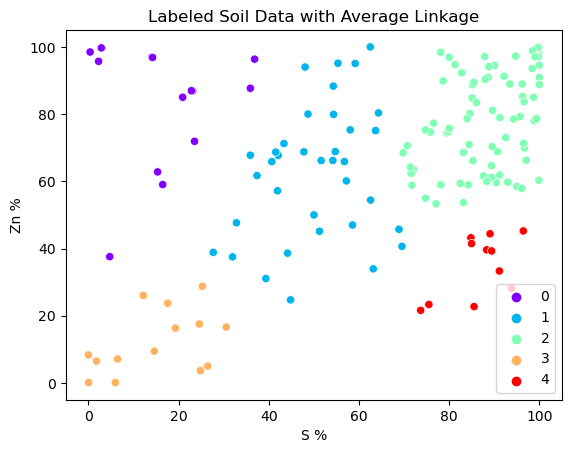

In [32]:
data_labels = clustering_model.labels_
sns.scatterplot(x='S %', 
                y='Zn %', 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Soil Data with Average Linkage')

**`Clusters: 7, Linkage: Ward`**

In [33]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters = 7, affinity='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_

array([4, 0, 3, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 4, 1, 1, 1, 4, 4, 3, 2, 0,
       4, 3, 4, 1, 5, 5, 0, 4, 2, 1, 6, 5, 5, 6, 1, 5, 0, 0, 0, 1, 2, 2,
       2, 1, 1, 2, 6, 1, 2, 4, 1, 1, 0, 1, 5, 1, 6, 1, 1, 5, 0, 4, 1, 3,
       1, 1, 1, 0, 0, 1, 0, 2, 3, 6, 5, 4, 1, 4, 1, 4, 1, 4, 3, 4, 1, 1,
       1, 2, 4, 2, 4, 1, 4, 4, 1, 4, 0, 4, 0, 3, 4, 4, 4, 0, 1, 0, 1, 1,
       3, 1, 6, 5, 6, 0, 4, 1, 4, 6, 0, 5, 4, 0, 4, 3, 2, 6, 2, 1, 2, 0,
       3, 1, 2, 0, 6, 3, 2, 2, 0, 4, 0, 6, 1, 4, 1, 0, 4, 0, 3, 1, 4, 0,
       2])

Text(0.5, 1.0, 'Labeled Soil Data with Ward Linkage')

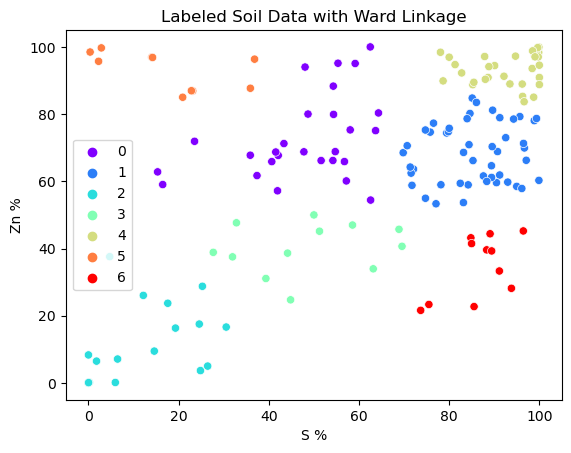

In [34]:
data_labels = clustering_model.labels_
sns.scatterplot(x='S %', 
                y='Zn %', 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Soil Data with Ward Linkage')

**`Glancing at scatter plots with cluster labels we can deduce that Average Linkage and Ward Linkage has performed better than the other two, with Single linkage being the worst.`**